## Marriage Trends in India

In [98]:
import pandas as pd
import numpy as np
from numpy.ma.core import arange
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('marriage_data_india.csv')
display(data.head())

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


In [99]:
display(data.isna().sum())

ID                      0
Marriage_Type           0
Age_at_Marriage         0
Gender                  0
Education_Level         0
Caste_Match             0
Religion                0
Parental_Approval       0
Urban_Rural             0
Dowry_Exchanged         0
Marital_Satisfaction    0
Divorce_Status          0
Children_Count          0
Income_Level            0
Years_Since_Marriage    0
Spouse_Working          0
Inter-Caste             0
Inter-Religion          0
dtype: int64

In [100]:
X = data.drop(columns=['ID','Divorce_Status'])
y = data['Divorce_Status']

X['Inter_Caste'] = X['Inter-Caste']
X['Inter_Religion'] = X['Inter-Religion']
X.drop(columns=['Inter-Caste','Inter-Religion'], inplace=True)

In [101]:
categorical_cols = [
    'Marriage_Type', 
    'Gender', 
    'Education_Level', 
    'Caste_Match', 
    'Religion', 
    'Parental_Approval', 
    'Urban_Rural', 
    'Dowry_Exchanged',
    'Marital_Satisfaction', 
    'Income_Level',
    'Spouse_Working', 
    'Inter_Caste', 
    'Inter_Religion']

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
display(X.head())

,Age_at_Marriage,Children_Count,Years_Since_Marriage,Marriage_Type_Love,Gender_Male,Education_Level_PhD,Education_Level_Postgraduate,Education_Level_School,Caste_Match_Same,Religion_Hindu,...,Urban_Rural_Urban,Dowry_Exchanged_Not Disclosed,Dowry_Exchanged_Yes,Marital_Satisfaction_Low,Marital_Satisfaction_Medium,Income_Level_Low,Income_Level_Middle,Spouse_Working_Yes,Inter_Caste_Yes,Inter_Religion_Yes
0,23,5,34,True,True,False,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
1,28,3,42,True,False,False,False,True,True,True,...,False,False,True,True,False,False,True,False,False,True
2,39,0,25,False,True,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,26,0,12,False,False,False,False,True,False,True,...,True,False,True,True,False,False,False,False,True,False
4,32,1,41,True,False,False,False,False,True,True,...,False,False,True,False,True,False,True,False,False,True


In [102]:
le = LabelEncoder()
y = le.fit_transform(y)

In [103]:
from imblearn.over_sampling import SMOTE
smote_obj = SMOTE()
X_new, y_new = smote_obj.fit_resample(X, y)

In [104]:
import statsmodels.api as sm

def backwardElimination(x, y, sl):
    numVars = len(x[0])
    indices = list(range(numVars))
    for i in range(0, numVars):
        obj_OLS = sm.OLS(y, x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, len(indices)):
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    indices.pop(j)
                    break
    display(obj_OLS.summary())
    return x, indices      

SL = 0.05
X_backe = np.append(arr=np.ones((len(X_new),1)), values=X_new, axis=1)
X_backe = X_backe.astype('float64')
X_sig = X_backe
X_Modeled, indices = backwardElimination(X_sig, y_new, SL)
display(X_Modeled)
display(indices)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     689.6
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:55:32   Log-Likelihood:                -7188.4
No. Observations:               17998   AIC:                         1.443e+04
Df Residuals:                   17973   BIC:                         1.462e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3079      0.015     85.307      0.000       1.278       1.338
x1             0.0011      0.000      2.644      0.008       0.000       0.002
x2            -0.0123      0.002     -7.538      0.000      -0.015      -0.009
x3            -0.0922      0.006    -15.551      0.000      -0.104      -0.081
x4            -0.1114      0.006    -19.871      0.000      -0.122      -0.100
x5            -0.2434      0.012    -20.464      0.000      -0.267      -0.220
x6            -0.2242      0.008    -26.536      0.000      -0.241      -0.208
x7            -0.1893      0.007    -27.231      0.000      -0.203      -0.176
x8            -0.0579      0.006    -10.229      0.000      -0.069      -0.047
x9            -0.2007      0.007    -30.397      0.000      -0.214      -0.188
x10           -0.2826      0.009    -30.058      0.000      -0.301      -0.264
x11           -0.3296      0.016    -20.283      0.000      -0.361      -0.298
x12           -0.3715      0.017    -22.000      0.000      -0.405      -0.338
x13           -0.2824      0.010    -28.930      0.000      -0.301      -0.263
x14           -0.1536      0.007    -22.864      0.000      -0.167      -0.140
x15           -0.0590      0.005    -10.803      0.000      -0.070      -0.048
x16           -0.1860      0.012    -16.089      0.000      -0.209      -0.163
x17           -0.1197      0.007    -18.005      0.000      -0.133      -0.107
x18           -0.2024      0.009    -23.379      0.000      -0.219      -0.185
x19           -0.1297      0.006    -21.913      0.000      -0.141      -0.118
x20           -0.1688      0.007    -22.585      0.000      -0.183      -0.154
x21           -0.1242      0.006    -19.653      0.000      -0.137      -0.112
x22           -0.0871      0.006    -15.581      0.000      -0.098      -0.076
x23           -0.1316      0.007    -19.305      0.000      -0.145      -0.118
x24           -0.1159      0.008    -14.570      0.000      -0.131      -0.100
==============================================================================
Omnibus:                      279.425   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.262
Skew:                           0.311   Prob(JB):                     3.44e-64
Kurtosis:                       3.046   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[ 1., 23.,  5., ...,  0.,  0.,  0.],
       [ 1., 28.,  3., ...,  0.,  0.,  1.],
       [ 1., 39.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1., 33.,  3., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  1.,  0.,  0.],
       [ 1., 37.,  4., ...,  0.,  1.,  0.]])

[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [105]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_new, y_new, test_size=0.5, random_state=42, stratify=y_new)

In [106]:
scaler_cols = ['Age_at_Marriage', 'Children_Count', 'Years_Since_Marriage']
scaler = StandardScaler()

X_train_smote[scaler_cols] = scaler.fit_transform(X_train_smote[scaler_cols])
X_train_smote[scaler_cols] = scaler.transform(X_train_smote[scaler_cols])

display(X_train_smote.head())
display(X_train_smote.head())

,Age_at_Marriage,Children_Count,Years_Since_Marriage,Marriage_Type_Love,Gender_Male,Education_Level_PhD,Education_Level_Postgraduate,Education_Level_School,Caste_Match_Same,Religion_Hindu,...,Urban_Rural_Urban,Dowry_Exchanged_Not Disclosed,Dowry_Exchanged_Yes,Marital_Satisfaction_Low,Marital_Satisfaction_Medium,Income_Level_Low,Income_Level_Middle,Spouse_Working_Yes,Inter_Caste_Yes,Inter_Religion_Yes
12626,-4.552686,-1.910738,-1.744130,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1655,-4.500725,-2.271340,-1.896804,True,True,False,True,False,True,False,...,False,False,True,True,False,False,False,True,False,False
10046,-4.734548,-2.271340,-1.728862,True,False,False,False,False,True,True,...,False,False,True,False,True,True,False,False,False,False
11820,-4.552686,-1.550136,-1.901893,True,True,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
1477,-4.734548,-0.828932,-1.881536,False,True,False,False,True,True,False,...,True,False,False,True,False,False,True,True,False,False


,Age_at_Marriage,Children_Count,Years_Since_Marriage,Marriage_Type_Love,Gender_Male,Education_Level_PhD,Education_Level_Postgraduate,Education_Level_School,Caste_Match_Same,Religion_Hindu,...,Urban_Rural_Urban,Dowry_Exchanged_Not Disclosed,Dowry_Exchanged_Yes,Marital_Satisfaction_Low,Marital_Satisfaction_Medium,Income_Level_Low,Income_Level_Middle,Spouse_Working_Yes,Inter_Caste_Yes,Inter_Religion_Yes
12626,-4.552686,-1.910738,-1.744130,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1655,-4.500725,-2.271340,-1.896804,True,True,False,True,False,True,False,...,False,False,True,True,False,False,False,True,False,False
10046,-4.734548,-2.271340,-1.728862,True,False,False,False,False,True,True,...,False,False,True,False,True,True,False,False,False,False
11820,-4.552686,-1.550136,-1.901893,True,True,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
1477,-4.734548,-0.828932,-1.881536,False,True,False,False,True,True,False,...,True,False,False,True,False,False,True,True,False,False


In [107]:
display(X_train_smote)

,Age_at_Marriage,Children_Count,Years_Since_Marriage,Marriage_Type_Love,Gender_Male,Education_Level_PhD,Education_Level_Postgraduate,Education_Level_School,Caste_Match_Same,Religion_Hindu,...,Urban_Rural_Urban,Dowry_Exchanged_Not Disclosed,Dowry_Exchanged_Yes,Marital_Satisfaction_Low,Marital_Satisfaction_Medium,Income_Level_Low,Income_Level_Middle,Spouse_Working_Yes,Inter_Caste_Yes,Inter_Religion_Yes
12626,-4.552686,-1.910738,-1.744130,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1655,-4.500725,-2.271340,-1.896804,True,True,False,True,False,True,False,...,False,False,True,True,False,False,False,True,False,False
10046,-4.734548,-2.271340,-1.728862,True,False,False,False,False,True,True,...,False,False,True,False,True,True,False,False,False,False
11820,-4.552686,-1.550136,-1.901893,True,True,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
1477,-4.734548,-0.828932,-1.881536,False,True,False,False,True,True,False,...,True,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14532,-4.422784,-0.468330,-1.917160,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4447,-4.474745,-0.468330,-1.871358,False,False,False,False,True,True,True,...,True,False,False,True,False,True,False,True,True,False
11139,-4.552686,-0.468330,-1.901893,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13505,-4.812490,-2.271340,-1.876447,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [108]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression()
classifierObj.fit(X_train_smote, y_train_smote)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test_smote)
print(y_pred)
#Predicting probabilities
y_pred_prob = classifierObj.predict_proba(X_test_smote)
#Print Model Accuracy
print(classifierObj.score(X_test_smote,y_test_smote))

[1 1 1 ... 1 1 1]
0.49983331481275695


In [109]:
# #Applying PCA
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix

# pcaObj = PCA(n_components=2)
# X_train_pca = pcaObj.fit_transform(X_new)
# X_test_pca = pcaObj.transform(X_test_smote)
# components_variance = pcaObj.explained_variance_ratio_
# print(components_variance)
# #Fitting Logistic Regression to Training Set
# classifierObj = LogisticRegression(random_state=0)
# classifierObj.fit(X_train_pca, y_train_smote)
# #Making predictions on the Test Set
# y_pred = classifierObj.predict(X_test_pca)
# #Evaluating the predictions using a Confusion Matrix
# cm = confusion_matrix(y_test_smote, y_pred)
# print(cm)


# # Visualizing the Training set results
# from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt
#
# X_set, y_set = X_train_smote, y_train_smote
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# cmap = ListedColormap(['red', 'blue', 'brown'])
# plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = cmap)
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# colors = ['red', 'blue', 'brown']
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = colors[i],
#                 label = j, cmap = cmap)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.show()


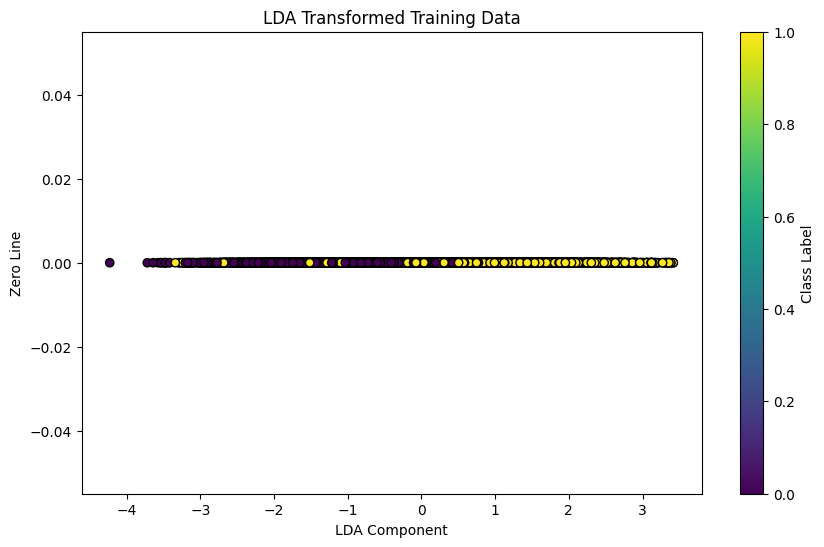

In [110]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

max_components = min(X_train_smote.shape[1], len(np.unique(y_train_smote)) - 1)
ldaObj = LDA(n_components=max_components)
X_train_lda = ldaObj.fit_transform(X_train_smote,y_train_smote)
X_test = ldaObj.transform(X_test_smote)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train_smote, cmap='viridis', edgecolor='k')
plt.title("LDA Transformed Training Data")
plt.xlabel("LDA Component")
plt.ylabel("Zero Line")
plt.colorbar(label='Class Label')
plt.show()


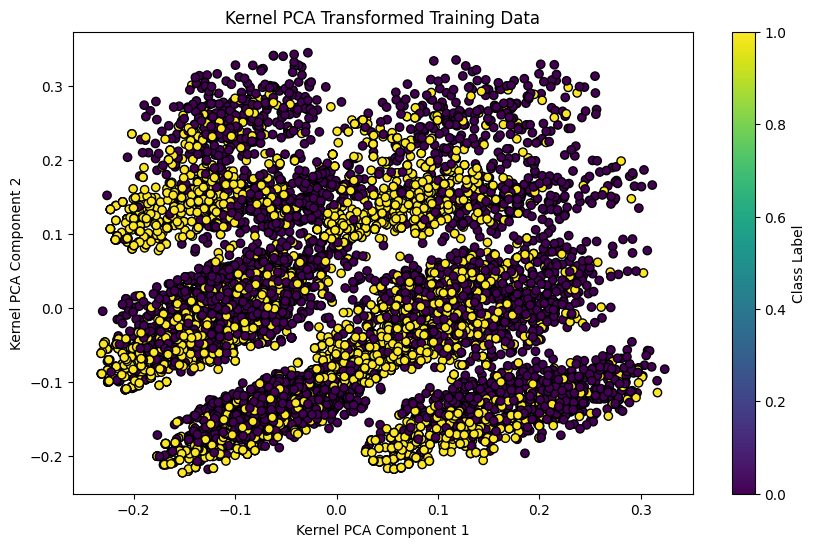

In [111]:
from sklearn.decomposition import KernelPCA

# Performing Kernel PCA
kernel_pca = KernelPCA(n_components=25, kernel='rbf')
X_train_kernel_pca = kernel_pca.fit_transform(X_train_smote)
X_test_kernel_pca = kernel_pca.transform(X_test_smote)

# Scatter plot of Kernel PCA transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_kernel_pca[:, 3], X_train_kernel_pca[:, 4], c=y_train_smote, cmap='viridis', edgecolor='k')
plt.title("Kernel PCA Transformed Training Data")
plt.xlabel("Kernel PCA Component 1")
plt.ylabel("Kernel PCA Component 2")
plt.colorbar(label='Class Label')
plt.show()


In [112]:
from sklearn.metrics import classification_report

def modelclassificationreport(classifier, classifierName):
    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test_smote)
    print("Classification Report for Classifier: {}, className: {}".format(classifier, classifierName))
    report = classification_report(y_test_smote, y_pred)
    print(report)

In [113]:
#logistic regression
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0)
modelclassificationreport(logistic_classifier, "Logistic Regression")

Classification Report for Classifier: LogisticRegression(random_state=0), className: Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4500
           1       0.50      1.00      0.67      4499

    accuracy                           0.50      8999
   macro avg       0.25      0.50      0.33      8999
weighted avg       0.25      0.50      0.33      8999



In [123]:
from sklearn.ensemble import RandomForestClassifier
modelclassificationreport(RandomForestClassifier(), "RandomForestClassifier")

Classification Report for Classifier: RandomForestClassifier(), className: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      4500
           1       0.94      0.59      0.72      4499

    accuracy                           0.77      8999
   macro avg       0.82      0.77      0.77      8999
weighted avg       0.82      0.77      0.77      8999



In [115]:
from sklearn.svm import SVC
modelclassificationreport(SVC(kernel='rbf'), "RBF SVM")

Classification Report for Classifier: SVC(), className: RBF SVM
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4500
           1       0.00      0.00      0.00      4499

    accuracy                           0.50      8999
   macro avg       0.25      0.50      0.33      8999
weighted avg       0.25      0.50      0.33      8999



c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [116]:
from sklearn.svm import SVC
modelclassificationreport(SVC(kernel='poly'), "SVM with poly")

Classification Report for Classifier: SVC(kernel='poly'), className: SVM with poly
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4500
           1       0.00      0.00      0.00      4499

    accuracy                           0.50      8999
   macro avg       0.25      0.50      0.33      8999
weighted avg       0.25      0.50      0.33      8999



c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [117]:
from sklearn.tree import DecisionTreeClassifier
modelclassificationreport(DecisionTreeClassifier(criterion="entropy"), "DecisionTreeClassifier")

Classification Report for Classifier: DecisionTreeClassifier(criterion='entropy'), className: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      4500
           1       0.73      0.64      0.69      4499

    accuracy                           0.71      8999
   macro avg       0.71      0.71      0.70      8999
weighted avg       0.71      0.71      0.70      8999



In [118]:
from sklearn.naive_bayes import GaussianNB
modelclassificationreport(GaussianNB(), "GaussianNB")

Classification Report for Classifier: GaussianNB(), className: GaussianNB
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4500
           1       0.00      0.00      0.00      4499

    accuracy                           0.50      8999
   macro avg       0.25      0.50      0.33      8999
weighted avg       0.25      0.50      0.33      8999



c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yelisev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

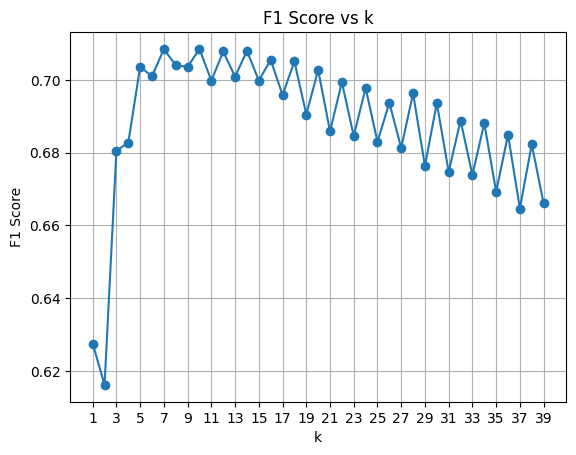

Best k: 10 at 0.7085314966232442
F1 Score: 0.6823017097689295


In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import f1_score

macro_f1_scores = []
for k in range(1, 40):
    classifierObj = KNeighborsClassifier(n_neighbors=k)
    classifierObj.fit(X_train_smote, y_train_smote)
    y_pred = classifierObj.predict(X_test_smote)
    f1 = f1_score(y_test_smote, y_pred, average='macro')
    macro_f1_scores.append(f1)

plt.plot(range(1, 40, 1), macro_f1_scores, marker='o')
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.title('F1 Score vs k')
plt.xticks(range(1, 40, 2))
plt.grid(True)
plt.show()

best_k_index = np.argmax(macro_f1_scores) + 1
print(f"Best k: {best_k_index} at {macro_f1_scores[best_k_index-1]}")

classifierObj = KNeighborsClassifier(n_neighbors=38)
classifierObj.fit(X_train_smote, y_train_smote)
y_pred = classifierObj.predict(X_test_smote)
f1 = f1_score(y_test_smote, y_pred, average='macro')
print(f"F1 Score: {f1}")


In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
]

votingClassifier = VotingClassifier(estimators=classifiers, voting='hard')
modelclassificationreport(votingClassifier, "VotingClassifier")

Classification Report for Classifier: VotingClassifier(estimators=[('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('LogisticRegression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=38))]), className: VotingClassifier
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      4500
           1       0.79      0.65      0.72      4499

    accuracy                           0.74      8999
   macro avg       0.75      0.74      0.74      8999
weighted avg       0.75      0.74      0.74      8999



Random Forest Classifier Accuracy: 0.7730858984331592
Confusion Matrix:
[[4332  168]
 [1874 2625]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      4500
           1       0.94      0.58      0.72      4499

    accuracy                           0.77      8999
   macro avg       0.82      0.77      0.76      8999
weighted avg       0.82      0.77      0.76      8999



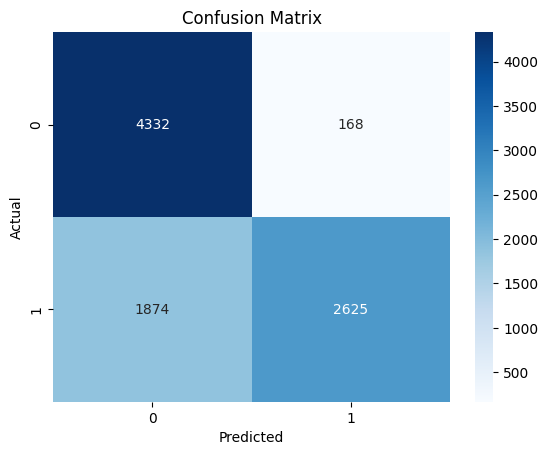

Feature ranking:
1. feature 2 (0.126462)
2. feature 0 (0.109745)
3. feature 1 (0.075088)
4. feature 7 (0.043731)
5. feature 6 (0.042578)
6. feature 4 (0.041763)
7. feature 23 (0.041747)
8. feature 22 (0.038242)
9. feature 19 (0.038118)
10. feature 14 (0.036455)
11. feature 13 (0.034392)
12. feature 18 (0.032900)
13. feature 3 (0.032630)
14. feature 9 (0.032441)
15. feature 17 (0.031982)
16. feature 15 (0.030576)
17. feature 21 (0.030067)
18. feature 24 (0.029808)
19. feature 20 (0.029632)
20. feature 8 (0.028132)
21. feature 10 (0.025769)
22. feature 5 (0.025059)
23. feature 16 (0.017342)
24. feature 12 (0.014700)
25. feature 11 (0.010638)


In [124]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test_smote)
print("Random Forest Classifier Accuracy:", rf.score(X_test_smote, y_test_smote))
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_smote, y_pred)
print("Confusion Matrix:") 
print(cm)

print("Classification Report:")
print(classification_report(y_test_smote, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
print("Feature ranking:")
for f in range(X_train_smote.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))
